* 决策树：一种非参数的有监督学习方法，能够从一些列有特征和标签的数据中总结出决策规则，用树状图的结构来呈现这些规则，以解决分类和回归问题。
* 根节点，中间节点，叶子节点，父节点，子节点，每个叶子节点都是一个标签类别
* tree.DecisionTreeClassifier  分类树
* tree.DecisionTreeRegressor 回归树

In [ ]:
classsklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

### 重要参数：criterion   
为了要将表格转化为一棵树，决策树需要找出最佳节点和最佳的分枝方法，对分类树来说，衡量这个“最佳”的指标叫做“不纯度”。通常来说，不纯度越低，决策树对训练集的拟合越好。现在使用的决策树算法在分枝方法上的核心大多是围绕在对某个不纯度相关指标的最优化上。

不纯度基于节点来计算，树中的每个节点都会有一个不纯度，并且子节点的不纯度一定是低于父节点的，也就是说，在同一棵决策树上，叶子节点的不纯度一定是最低的。
Criterion这个参数正是用来决定不纯度的计算方法的。sklearn提供了两种选择：

　　1）输入”entropy“，使用信息熵（Entropy）

　　2）输入”gini“，使用基尼系数（Gini Impurity）

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target.shape

(178,)

In [6]:
import pandas as pd

In [7]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [59]:
wine.feature_names #数据集特征的名字

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [60]:
wine.target_names  # 标签的名字

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [61]:
#0.3 即30%做测试集，70%做训练集,注意顺序
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)    #train_test_split随机划分训练结构

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)  # 返回预测的准确度 accuracy

In [36]:
score

0.9444444444444444

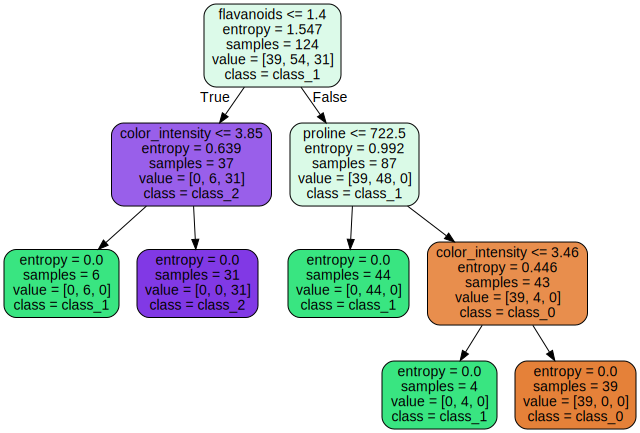

In [39]:
import graphviz
# entropy 不纯度，不纯度越低，过拟合越小
dot_data = tree.export_graphviz(clf
                               ,feature_names = wine.feature_names
                               ,class_names = wine.target_names
                               ,filled = True  # 填充颜色   颜色代表标签分类
                               ,rounded=True  # 圆弧轮廓        
                               )
graph = graphviz.Source(dot_data)
graph

In [41]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42668956, 0.        , 0.        , 0.22340154,
       0.        , 0.        , 0.34990891])

In [42]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4266895589517737),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.2234015360151226),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.34990890503310385)]

In [83]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=25)  # random_state用来设置分支中的随机模式
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)  # 返回预测的准确度 accuracy
score

0.9629629629629629

In [140]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=77,splitter='random')  # random_state用来设置分支中的随机模式,splitter也用来控制随机性
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)  # 返回预测的准确度 accuracy
score   #一切都是以追求这个分数为目标

0.9814814814814815

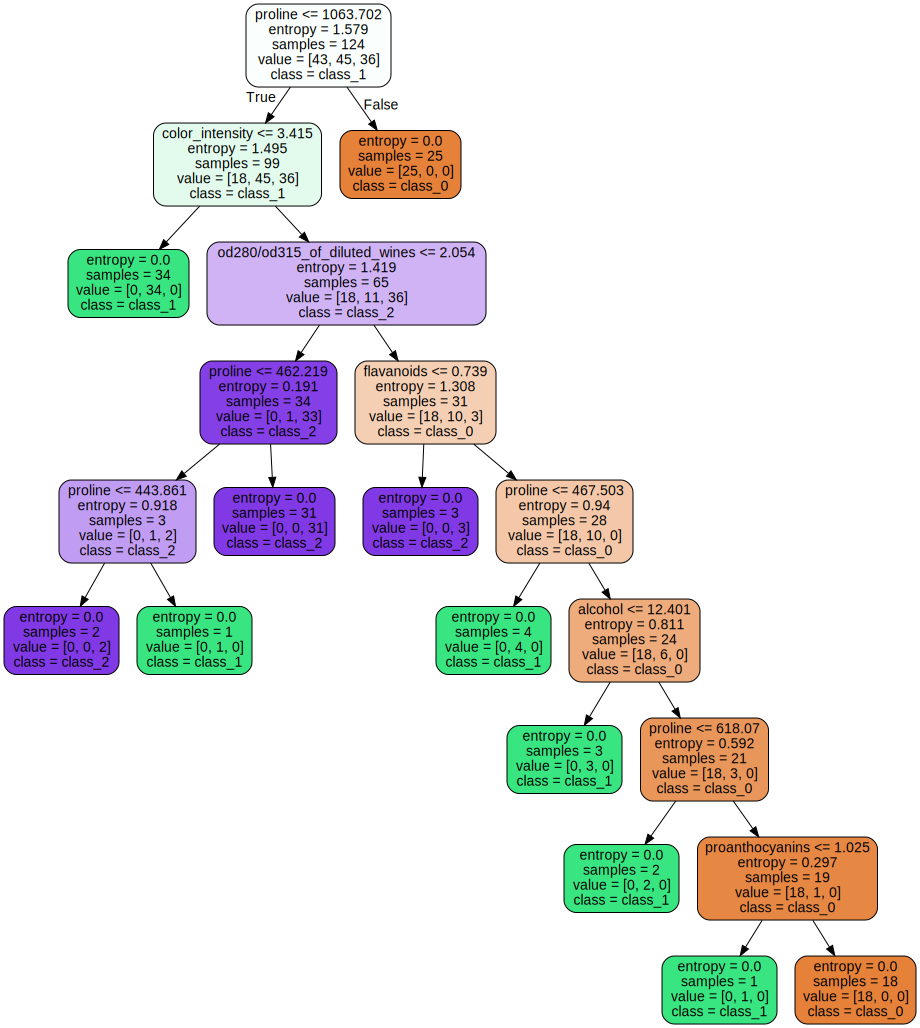

In [85]:
import graphviz
# entropy 不纯度，不纯度越低，过拟合越小
dot_data = tree.export_graphviz(clf
                               ,feature_names = wine.feature_names
                               ,class_names = wine.target_names
                               ,filled = True  # 填充颜色   颜色代表标签分类
                               ,rounded=True  # 圆弧轮廓        
                               )
graph = graphviz.Source(dot_data)
graph

In [86]:
score = clf.score(Xtest,Ytest)  # 返回预测的准确度 accuracy
score   #一切都是以追求这个分数为目标

0.9629629629629629

In [78]:
# 树对训练集的拟合程度如何
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

为了让决策树有更好的泛化性，需要对决策数进行剪枝，剪枝策略对决策树的影响巨大，正确的剪枝策略是优化决策树算法的关键，sklearn提供了不同的剪枝策略：
* max_depth  限制树的最大深度，超过设定深度的树枝全部剪掉，实际使用建议从3开始  
* min_samples_leaf & min_samples_split 
* max_features & min_impurity_decrease  一般max_depth使用，用作树的的精修
    * max_features 限制分支时考虑的特征个数，超过限制个数的特征都会被舍弃，和max_depth类似
    * min_impurity_decrease 限制信息增益的大小，信息增益小于设定数值的分支不会发生。信息增益：父节点和子节点信息熵的差，子节点的信息熵一定小于父节点信息熵，信息增益越大时，说明这一分支对于决策树的贡献越大

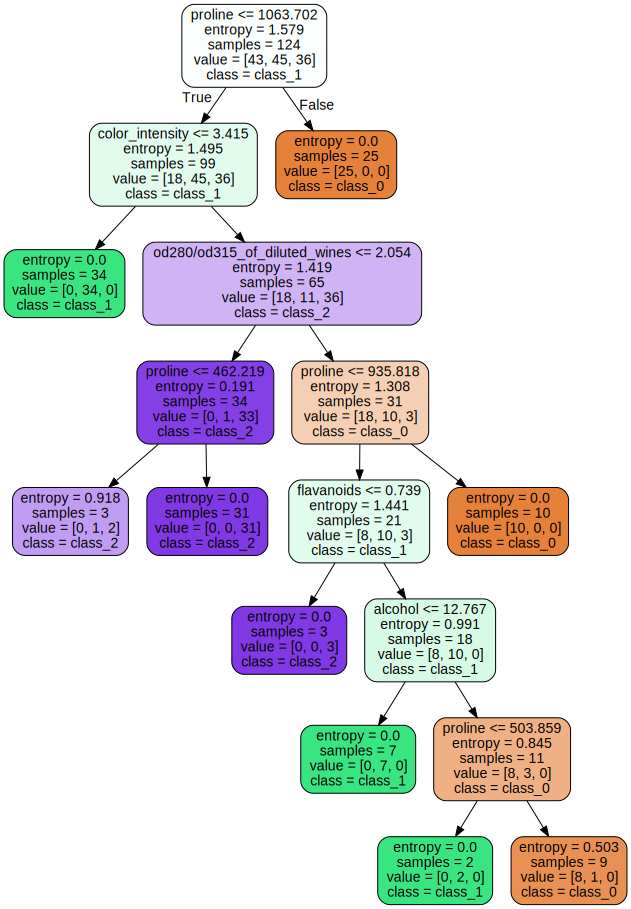

In [117]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=45
                                 ,splitter='random'
                                 ,max_depth=7
#                                  ,min_samples_leaf=10  #去掉小于10的叶子节点
                                 ,min_samples_split=10  #小于这个数的中间节点去掉分支
                                 )  # random_state用来设置分支中的随机模式
clf = clf.fit(Xtrain,Ytrain)
dot_data = tree.export_graphviz(clf
                               ,feature_names = wine.feature_names
                               ,class_names = wine.target_names
                               ,filled = True  # 填充颜色   颜色代表标签分类
                               ,rounded=True  # 圆弧轮廓        
                               )
graph = graphviz.Source(dot_data)
graph

In [118]:
score = clf.score(Xtest,Ytest)  # 返回预测的准确度 accuracy
score   #一切都是以追求这个分数为目标

0.9814814814814815

### 如何确定最优剪枝参数  
如何具体去确定每个参数的值，就需要用超参数曲线来进行判断    
超参数学习曲线，是一条以参数的取值为横坐标，模型的度量指标为纵坐标的曲线，他是用来衡量不同超参数取值下模型表现的线，在以上建好的决策树里，度量指标就是score

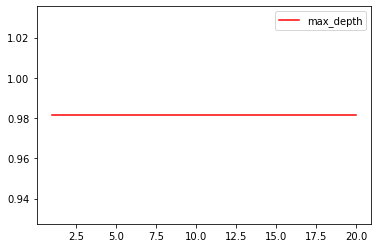

In [162]:
import matplotlib.pyplot as plt

test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=77
                                 ,splitter='random'
                                 ,max_depth=5
                                 ,min_samples_leaf=2  #去掉小于10的叶子节点
                                 ,min_samples_split=3  #小于这个数的中间节点去掉分支
                                 )  # random_state用来设置分支中的随机模式
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)  # 返回预测的准确度 accuracy
    test.append(score)
plt.plot(range(1,21),test,color='red',label='max_depth')
plt.legend()
plt.show()

- 调参没有绝对的答案，一切都看数据本身

In [163]:
# apply 返回每个测试样本所在叶子节点的索引
clf.apply(Xtest)

array([14,  6,  6, 14,  9, 21,  9,  6,  9, 21, 24, 14, 14, 14, 14,  9, 16,
       11,  9, 14, 11,  9, 24, 21, 24, 16, 21, 14, 16,  6, 21, 14, 14, 21,
       21, 21, 21, 14,  6, 11, 14, 11, 11, 21, 16, 14, 19, 14, 19, 14, 14,
       21, 21,  9], dtype=int64)

In [164]:
# predict 返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 2])

- 所有接口中要求输入的X_train 和 X_test的部分，输入的特征矩阵必须至少是一个二维矩阵，sklearn不接受任何一位矩阵的作为特征矩阵输入   
- 如果数据只有一个特征，必须用shape(-1,1)来给矩阵增维，如果数据只有一个特征和一个样本，使用shape(1,-1)给数据增维